# Amazon Product Rating Prediction


## Introduction:-
Amazon.com is an American multinational technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. Amazon has millions of products and billions of customers. One of the basic and most influential features of Amazon is that you can give a review about the product you buy. This review plays an important role when you want to buy a product as the product with better reviews is most likely to be purchased. Therefore depending on online reviews has hence become natural for customers.

When looking for a product a customer needs to find useful and credible reviews as fast as possible and comparing text reviews can be a daunting task. So Amazon has 5 stars rating which will give you an overview of the quality of the product with 1 means not that good and 5 meaning really good.

However, many other platforms do not have this rating system. In such cases, it is very important to have a model that could predict the rating of the product using text reviews.

## Aim:-
The purpose of this project is to develop a model that could predict its rating based on text reviews. While this model is built to work with any kind of product, this project includes reviews from Amazon’s phones and accessories dataset.


-------------------------------------------------------------------------------------------------------------------------------

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Load

In [2]:
# I tried to read .gz file using gzip module but for some reason(may be size is too big) i was not able to read the data. 
#So i manually unzip the file in file explorer. 
import gzip
path_zip = r'..\Raw_Data\reviews_Cell_Phones_and_Accessories_5.json.gz'
path_json = r'..\Raw_Data\Cell_Phones_and_Accessories_5.json'
with gzip.open(path_zip) as file:
    data = file.read()

Review_DF = pd.read_json(path_json, lines = True)
#Got an ValueError:Trailing Line while loading .json file which was resolved using lines = True parameter.

In [3]:
print("###############################################################################################################")
print("Original Column names: \n", Review_DF.columns)

New_Column_Names = ['User_ID', 'Product_ID', 'User_Name', 'Rating_Helpfulness', 'Text_Review', 
                    'Ratings', 'Review_Summary', 'Review_Timestamp_Unix', 'Review_Date']

Review_DF.columns = New_Column_Names

print("New Column names: \n", Review_DF.columns)
print("###############################################################################################################")

###############################################################################################################
Original Column names: 
 Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')
New Column names: 
 Index(['User_ID', 'Product_ID', 'User_Name', 'Rating_Helpfulness',
       'Text_Review', 'Ratings', 'Review_Summary', 'Review_Timestamp_Unix',
       'Review_Date'],
      dtype='object')
###############################################################################################################


In [4]:
print("Shape of the Dataset: ", Review_DF.shape)
Review_DF.head()

Shape of the Dataset:  (194439, 9)


,User_ID,Product_ID,User_Name,Rating_Helpfulness,Text_Review,Ratings,Review_Summary,Review_Timestamp_Unix,Review_Date
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


-------------------------------------------------------------------------------------------------------------------------------
### Initital EDA

In [5]:
print("###############################################################################################################")

print("Total Number of Reviews: ", Review_DF.shape[0], "\n")
print("Total Number of Unique Users: ", len(Review_DF.User_ID.unique()), "\n")
print("Total Number of Unique Products: ", len(Review_DF.Product_ID.unique()), "\n")
print("Averge Rating Score: ", Review_DF.Ratings.mean(), "\n")

print("###############################################################################################################")

###############################################################################################################
Total Number of Reviews:  194439 

Total Number of Unique Users:  27879 

Total Number of Unique Products:  10429 

Averge Rating Score:  4.129912208970422 

###############################################################################################################


In [6]:
print("############################################################################################################### \n")
Review_DF.info()
print("############################################################################################################### \n")
print("Total number of null values in each column: ")
print(Review_DF.isnull().sum())

print("############################################################################################################### \n")

############################################################################################################### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   User_ID                194439 non-null  object
 1   Product_ID             194439 non-null  object
 2   User_Name              190920 non-null  object
 3   Rating_Helpfulness     194439 non-null  object
 4   Text_Review            194439 non-null  object
 5   Ratings                194439 non-null  int64 
 6   Review_Summary         194439 non-null  object
 7   Review_Timestamp_Unix  194439 non-null  int64 
 8   Review_Date            194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB
############################################################################################################### 

Total number of null values in each col

**Obeservations**
* There are 3519 null values in User_Name Column.
* Need to change dtype of Review_Date and Review_Timestamp_Unix
* Rating helpfulness has a list of numerator and denominator which needs to be converted into fractions

-------------------------------------------------------------------------------------------------------------------------------
### Exploratory Data Analysis

In [7]:
Review_DF.groupby('Ratings').size()

Ratings
1     13279
2     11064
3     21439
4     39993
5    108664
dtype: int64

Text(0, 0.5, 'Frequency')

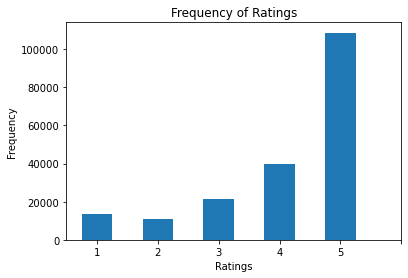

In [8]:
Review_DF.groupby('Ratings').size().plot(kind = 'bar')
plt.xticks([0,1,2,3,4,5], rotation = 0);
plt.title("Frequency of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")

In [9]:
Review_DF['Review_Date'] = pd.to_datetime(Review_DF['Review_Date'])

In [10]:
test = pd.to_datetime(Review_DF['Review_Timestamp_Unix'], unit = 's')
test

0        2014-05-21
1        2014-01-14
2        2014-06-26
3        2013-10-21
4        2013-02-03
            ...    
194434   2014-07-21
194435   2014-07-21
194436   2014-07-21
194437   2014-07-20
194438   2014-07-21
Name: Review_Timestamp_Unix, Length: 194439, dtype: datetime64[ns]

Dropping unix timestamp as it contains same info as Review date just in different format.

In [11]:
Review_DF.drop('Review_Timestamp_Unix', inplace = True, axis = 1)

In [12]:
Review_EDA_DF = Review_DF.copy()
Review_EDA_DF['Year'] = pd.DatetimeIndex(Review_EDA_DF['Review_Date']).year
Review_EDA_DF['Month'] = pd.DatetimeIndex(Review_EDA_DF['Review_Date']).month

In [13]:
Year_Mean_Rating_DF = Review_EDA_DF.groupby('Year').mean('Rating')
Year_Mean_Rating_DF

,Ratings,Month
Year,,
2001,5.000000,2.000000
2002,5.000000,10.000000
2003,5.000000,12.000000
2004,3.704545,7.613636
2005,3.715385,7.000000
2006,3.545833,6.633333
2007,3.987147,6.614396
2008,3.960118,6.775480
2009,3.892884,7.236419


<BarContainer object of 14 artists>

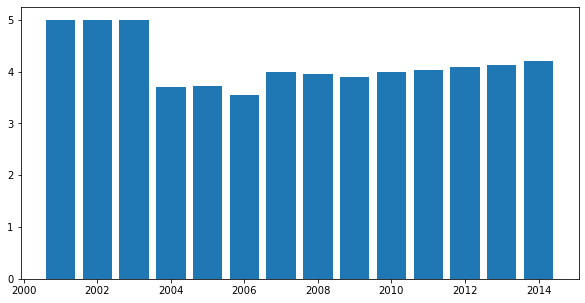

In [14]:
plt.figure(figsize = (10,5))
plt.bar(x = Year_Mean_Rating_DF.index, height = Year_Mean_Rating_DF['Ratings'] )


In [15]:
path = r'..\Data\01_Clean_Review_Data.json'
Review_DF.to_json(path)